In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression, QuantileRegressor
from matplotlib import pyplot as plt
import numpy as np

In [29]:
data = pd.read_csv("contratos_spot.csv", sep=",")

In [30]:
data.Spot.values


array([ 32.53,  31.59,  30.67,  39.11,  32.14,  30.9 ,  29.64,  27.72,
        28.13,  32.78,  42.69,  32.76,  29.6 ,  28.73,  28.59,  29.37,
        31.47,  29.56,  29.7 ,  30.35,  30.57,  31.99,  31.33,  31.43,
        32.45,  33.37,  35.41,  39.05,  43.95,  36.94,  32.87,  33.36,
        35.77,  31.5 ,  31.26,  29.78,  30.1 ,  29.18,  29.82,  30.68,
        30.59,  29.87,  30.84,  30.8 ,  31.49,  32.99,  39.29,  33.11,
        32.07,  31.37,  31.42,  29.5 ,  28.53,  29.95,  28.17,  30.42,
        28.76,  29.78,  30.77,  30.61,  29.47,  31.17,  30.63,  30.15,
        29.19,  30.73,  28.36,  27.24,  27.85,  27.92,  25.92,  25.6 ,
        27.18,  32.55,  33.49,  29.49,  26.99,  30.68,  34.45,  37.24,
        35.82,  35.26,  30.55,  30.52,  29.59,  30.17,  30.09,  34.75,
        36.33,  33.7 ,  31.16,  31.86,  30.16,  27.54,  28.  ,  27.88,
        26.89,  26.12,  26.46,  28.27,  29.76,  26.73,  27.6 ,  28.73,
        22.56,  19.57,  24.15,  26.99,  23.08,  22.87,  27.29,  26.48,
      

In [31]:
reg = LinearRegression().fit(data.Spot.values.reshape(-1, 1), data.Contratos.values)

In [32]:
reg.coef_, reg.intercept_

(array([0.63592892]), 11.73512347283354)

In [79]:
from sklearn.utils.fixes import sp_version, parse_version
solver = "highs"
# solver = "interior-point"
reg = QuantileRegressor(quantile=0.1, solver=solver, alpha=0).fit(data.Spot.values.reshape(-1, 1), data.Contratos.values)

In [80]:
reg.coef_, reg.intercept_

(array([0.49635509]), 10.317333549327717)

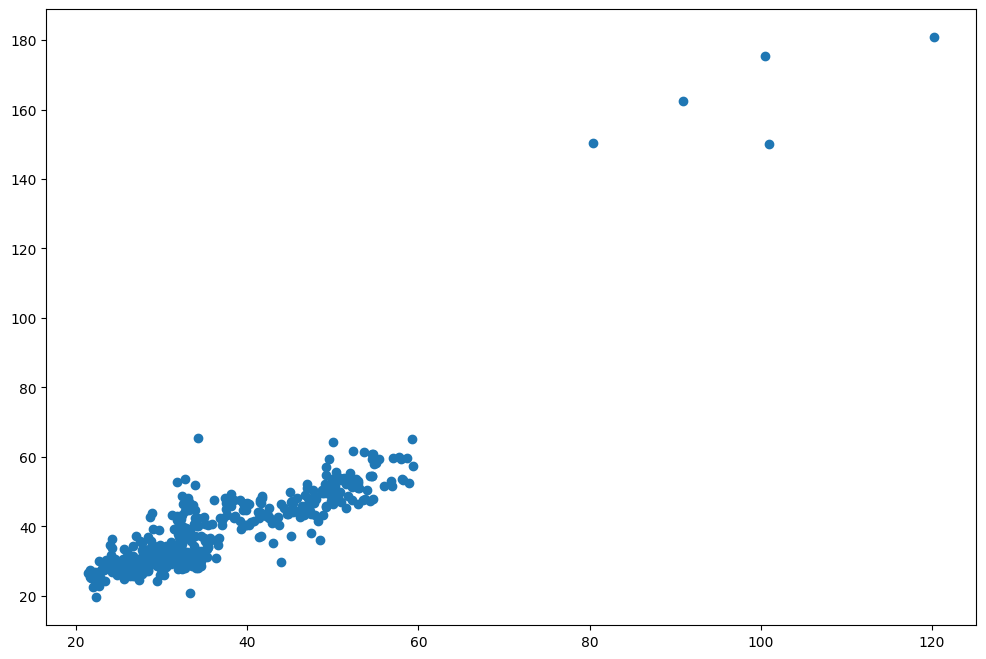

In [38]:
plt.figure(figsize=(12, 8))
plt.scatter(data.Contratos.values, data.Spot.values)

In [48]:
x = np.linspace(0, 120, 120) 

In [81]:
def func(x):
    y = 11.7351 + 0.6359*x
    return y
def quant_func_10(x):
    y = 10.3173 + 0.4963*x
    return y
def quant_func_50(x):
    y = 3.5689 + 0.8657*x
    return y

In [83]:
y = [func(xi) for xi in x]  
y_quant_reg_10 = [quant_func_10(xi) for xi in x] 
y_quant_reg_50 = [quant_func_50(xi) for xi in x] 

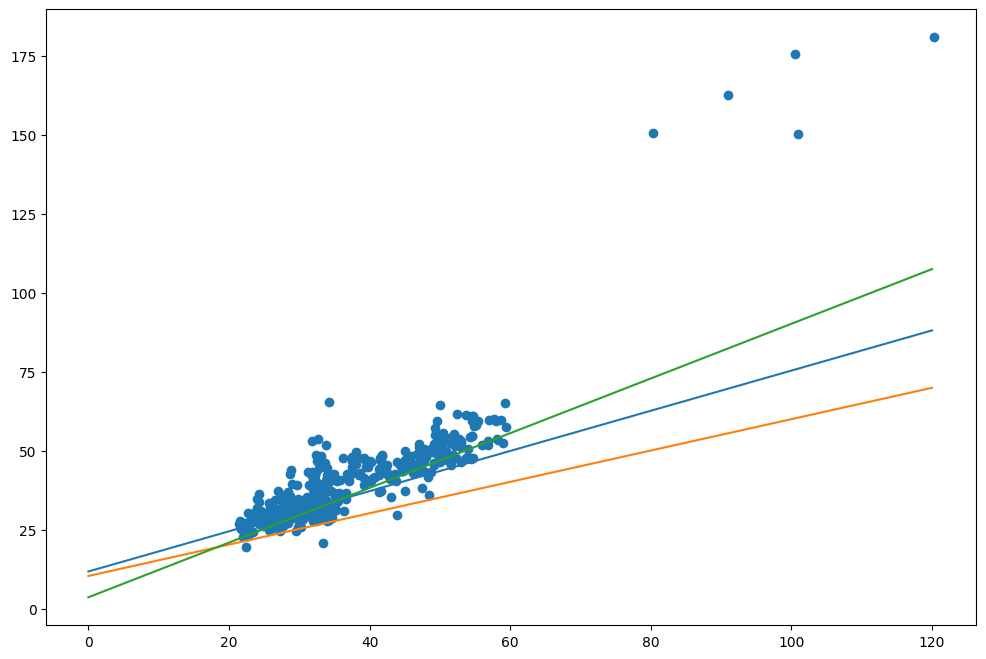

In [84]:
plt.figure(figsize=(12, 8))
plt.scatter(data.Contratos.values, data.Spot.values)
plt.plot(x, y)
plt.plot(x, y_quant_reg_10)
plt.plot(x, y_quant_reg_50)

(array([ 2.,  1.,  7., 14., 44., 37., 64., 48., 28., 16., 22.,  7., 19.,
        13., 26., 18., 23., 24., 13., 18., 20., 11.,  2.,  4.,  6.,  4.,
         1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 19.57  ,  21.1825,  22.795 ,  24.4075,  26.02  ,  27.6325,
         29.245 ,  30.8575,  32.47  ,  34.0825,  35.695 ,  37.3075,
         38.92  ,  40.5325,  42.145 ,  43.7575,  45.37  ,  46.9825,
         48.595 ,  50.2075,  51.82  ,  53.4325,  55.045 ,  56.6575,
         58.27  ,  59.8825,  61.495 ,  63.1075,  64.72  ,  66.3325,
         67.945 ,  69.5575,  71.17  ,  72.7825,  74.395 ,  76.0075,
         77.62  ,  79.2325

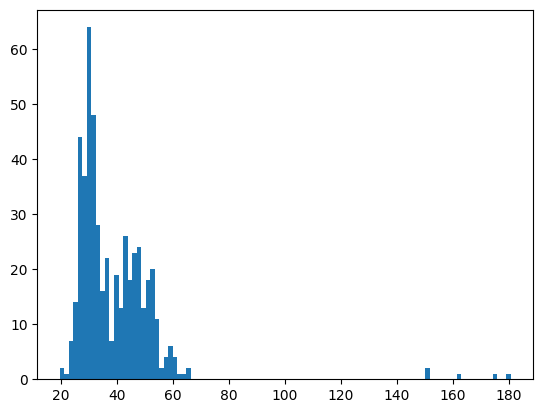

In [87]:
plt.hist(data.Spot.values, bins=100)